# CS210 - Homework #1: Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [3]:
#SCRAPING WAY - 25 POINTS

#önce url'yi koyuyoruz.
#recit----------------webscrappinge------------------------------
#url = 'https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG' #-- olmadı bu, beautifulSouptan deniyorum
#url = 'file:///C:/Users/ASUS/Downloads/CS210%20-%20Homework%201%20-%20for%20BeautifulSoup%20(2).html'
# Path to your local HTML file

#file path
file_path = 'C:/Users/ASUS/Downloads/CS210 - Homework 1 - for BeautifulSoup (2).html'

# Open the file and read its content
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = bs4.BeautifulSoup(html_content, 'html.parser')

# Find the table
playlist_table = soup.find('table', {'id': 'tracks-table'})

# Initialize an empty list to store the song data
songs_data = []
len_supposedtoBe = 23

if playlist_table is not None:
    # Find the rows
    rows = playlist_table.find_all('tr', {'data-id-song': True})
    # Initialize a counter
    song_number = 1
    for row in rows:
        # Find the song name
        #song_name = row.find("td", {"class": "td-name"}).text.strip()

        # Print the song name
        #print(f"Song Name: {song_name}")
        #ilk tüm tdleri bulup bir liste gibi düşünüp her data için loopa sokalım  
        td = row.find_all("td")
        
        # Extract the song information
        if not len(td) < len_supposedtoBe:
            song_name = td[1].text
            artist_name = td[2].text
            popularity = td[3].text
            bpm = td[4].text
            genres = td[5].text
            parent_genres = td[6].text
            album = td[7].text
            album_date = td[8].text
            time = td[9].text
            dance = td[10].text
            energy= td[11].text
            acoustic= td[12].text
            instrumental= td[13].text
            happy= td[14].text
            speech= td[15].text
            live= td[16].text
            loud= td[17].text
            key= td[18].text
            time_signature= td[19].text
            added_at= td[20].text
            spotify_track_id= td[21].text
            album_label= td[22].text
            camelot = td[23].text
            # Extract Spotify Track Img information
            # Find the img element and get the src attribute
            img_element = row.find("img", {"class": "track-table-img"})
    
           
               
           
            
            if img_element is not None:
                spotify_track_img = img_element["src"]
                 # Appendliyoruz
                songs_data.append([
                    song_number, song_name, artist_name, popularity, bpm, genres, parent_genres, album,
                    album_date, time, dance, energy, acoustic, instrumental, happy, speech, live,
                    loud, key, time_signature, added_at, spotify_track_id, album_label, camelot,
                    spotify_track_img
                ])
                song_number = song_number + 1
else:
    print("Playlist table not found")
        
    
       

# DATAFRAME YARAT

df = pd.DataFrame(songs_data, columns = ['#', 'Song Name', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres',
           'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy',
           'Speech', 'Live', 'Loud', 'Key', 'Time Signature', 'Added At', 'Spotify Track Id',
           'Album Label', 'Camelot', 'Spotify Track Image'])

# Display the DataFrame
df.head()
    


# Find the playlist table using the id attribute
#playlist_table = soup.find('table', {'id': 'tracks-table'})

#if playlist_table is not None:
 #   song_rows = playlist_table.find_all("tr")
  #  # Loop through each song row
   # for song_row in song_rows:
        # Find the song name and album name
    #    song_name = song_row.find("td", {"class": "song-name"}).text.strip()
     #   album_name = song_row.find("td", {"class": "album-name"}).text.strip()

        # Print the song name and album name
      #  print(f"Song Name: {song_name}, Album Name: {album_name}")
#else:
   # print("Playlist table not found")
# Find all <tr> elements with the data-id-song attribute
#song_rows = soup.find_all('tr', {'data-id-song': True})
# Loop through each song row
#for song_row in song_rows:
    # Find the song name and album name within the song_row
   # song_name = song_row.find("td", {"class": "song-name"}).text.strip()
    #album_name = song_row.find("td", {"class": "album-name"}).text.strip()

    # Print the song name and album name
  #  print(f"Song Name: {song_name}, Album Name: {album_name}")

,#,Song Name,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Speech,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Image
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,https://i.scdn.co/image/ab67616d00004851f65d72...
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B,https://i.scdn.co/image/ab67616d00004851187331...
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A,https://i.scdn.co/image/ab67616d00004851bfa99a...
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,...,0,0,-10 db,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A,https://i.scdn.co/image/ab67616d000048519b9b36...
4,5,I Know The End,Phoebe Bridgers,0,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,...,0,20,-10 db,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B,https://i.scdn.co/image/ab67616d000048513040ca...


In [40]:
#READ THE DATA DIRECTLY - 0 PTS

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [106]:
#2pts - show the first 3 rows
df.head(3)


,#,Song Name,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Speech,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Image
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,https://i.scdn.co/image/ab67616d00004851f65d72...
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B,https://i.scdn.co/image/ab67616d00004851187331...
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A,https://i.scdn.co/image/ab67616d00004851bfa99a...


In [107]:
#1pts - show the info of dataframe
df

,#,Song Name,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Speech,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Image
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,https://i.scdn.co/image/ab67616d00004851f65d72...
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B,https://i.scdn.co/image/ab67616d00004851187331...
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A,https://i.scdn.co/image/ab67616d00004851bfa99a...
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,...,0,0,-10 db,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A,https://i.scdn.co/image/ab67616d000048519b9b36...
4,5,I Know The End,Phoebe Bridgers,0,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,...,0,20,-10 db,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B,https://i.scdn.co/image/ab67616d000048513040ca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,forever,Charli XCX,53,87,"art pop, candy pop, metropopolis, pop, uk pop","Pop, Electronic",how i'm feeling now,2020-05-15,04:03,...,10,10,-3 db,C♯/D♭ Minor,4,2023-10-26,5GsJIVCBFjhCcUwJaTW2sB,Atlantic Records UK,12A,https://i.scdn.co/image/ab67616d00004851664e38...
322,323,Silk Chiffon,"MUNA,Phoebe Bridgers",71,97,"indie pop, indie poptimism, la pop, metropopol...","Pop, Electronic",MUNA,2022-06-24,03:26,...,0,10,-6 db,G#/A♭ Major,4,2023-10-26,5ECxiK4Vigo1yRRmAoZc1f,Dead Oceans,4B,https://i.scdn.co/image/ab67616d00004851bb5a3d...
323,324,So Hot You're Hurting My Feelings,Caroline Polachek,69,112,"art pop, escape room, indie pop, indietronica",Pop,Pang,2019-10-18,03:03,...,0,10,-5 db,F#/G♭ Major,4,2023-10-26,5B6Kjha6RRIMWGN7zGsAaT,Perpetual Novice,2B,https://i.scdn.co/image/ab67616d000048517d983e...
324,325,First Love/Late Spring,Mitski,81,100,"brooklyn indie, pov: indie","Rock, Pop",Bury Me At Makeout Creek,2014-11-11,04:38,...,0,20,-8 db,C Major,4,2023-10-26,3sslYZcFKtUvIEWN9lADgr,Dead Oceans,8B,https://i.scdn.co/image/ab67616d00004851e90db8...


In [108]:
#2pts - give the statistical summary of numerical columns
df.describe()

,#
count,326.000000
mean,163.500000
std,94.252321
min,1.000000
25%,82.250000
50%,163.500000
75%,244.750000
max,326.000000


Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [4]:
# Split multiple genres and explode the list into separate rows
genres_split = df['Genres'].str.split(',').explode()

# Remove leading and trailing whitespaces
genres_split = genres_split.str.strip()

# Get the top 11 most frequent genres
top_genres = genres_split.value_counts().head(11)

# Convert the series to a string
top_genres_str = top_genres.to_string()

# Remove the last line
top_genres_str = '\n'.join(top_genres_str.split('\n')[:-1])

# Print the result
print(top_genres_str)

Genres
indie rock        113
modern rock       104
art pop            80
rock               74
indie pop          64
chamber pop        58
permanent wave     48
pov: indie         41
indietronica       38
garage rock        37


Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [5]:
# Step 1: Split and explode the 'Genres' column
expanded_genres = df['Genres'].str.split(', ').explode()

# Step 2: Group by genre and count the occurrences
genre_counts = expanded_genres.value_counts()

# Step 3: Filter out genres that occur 10 times or less
frequent_genres = genre_counts[genre_counts > 10].index

# Step 4: Calculate average popularity for each of these genres
# First, ensure 'Popularity' is numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Creating a temporary DataFrame with exploded genres
temp_df = df.assign(Genres=df['Genres'].str.split(', ')).explode('Genres')

# Filtering frequent genres and calculating average popularity
average_popularity = temp_df[temp_df['Genres'].isin(frequent_genres)].groupby('Genres')['Popularity'].mean()

# Step 5: Find the top 5 genres based on average popularity
top_5_genres = average_popularity.nlargest(5)

print(top_5_genres.to_frame().to_string(header=False))

Genres                    
permanent wave   67.916667
pop              65.823529
sheffield indie  65.645161
garage rock      65.027027
la indie         62.076923


Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [6]:
df['BPM'] = pd.to_numeric(df['BPM'], errors='coerce')
popularity_categoriess = [float('-inf'), df['Popularity'].quantile(0.25), df['Popularity'].quantile(0.75), float('inf')]
popularity_category_labels = ['Low', 'Medium', 'High']
#POPULARITY BURDA
df['Popularity_Category'] = pd.cut(df['Popularity'], bins=popularity_categoriess, labels=popularity_category_labels, include_lowest=True)
#BPMLER BURDA
bpm_categoriess = [float('-inf'), 99.9999, 130, float('inf')]
bpm_category_labels = ['Slow', 'Medium', 'Fast']

df['BPM_Category'] = pd.cut(df['BPM'], bins=bpm_categoriess, labels=bpm_category_labels, include_lowest=True)
#print kısmı
df[['Popularity_Category', 'BPM_Category']]

,Popularity_Category,BPM_Category
0,High,Medium
1,High,Medium
2,High,Slow
3,High,Medium
4,Low,Medium
...,...,...
321,Medium,Slow
322,High,Slow
323,High,Medium
324,High,Medium


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [7]:
# Strip leading and trailing whitespaces from the 'Song Name' and 'Artist' columns
df['Song Name'] = df['Song Name'].str.strip()
df['Artist'] = df['Artist'].str.strip()

# Filter the dataset for the specified song and artist
filtered_song = df[(df['Song Name'] == 'Crying Lightning') & (df['Artist'] == 'Arctic Monkeys')]

# Print the filtered song
filtered_song


,#,Song Name,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Image,Popularity_Category,BPM_Category
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,https://i.scdn.co/image/ab67616d00004851f65d72...,High,Medium


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [147]:
#sadece integer olan valueları bırakıyoruz
df['Loud'] = pd.to_numeric(df['Loud'].replace('[^0-9.]', '', regex=True), errors='coerce')
#popularity icin bu
high_popularity_condition = df['Popularity_Category'] == 'High'
#bpm icin bu
fast_bpm_condition = df['BPM_Category'] == 'Fast'
#loud icin bu
loudness_condition = df['Loud'] > df['Loud'].quantile(0.75)
filtered_tracks = df[high_popularity_condition & fast_bpm_condition & loudness_condition]
most_common_album = filtered_tracks['Album'].mode().iloc[0]
print(f"The most common album among tracks with High popularity, Fast BPM, and above 75th percentile in loudness is: {most_common_album}")

The most common album among tracks with High popularity, Fast BPM, and above 75th percentile in loudness is: Black Friday


Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [146]:
#5pts

# Calculate the popularity threshold for the top 10%
popularity_threshold = df['Popularity'].quantile(0.9)

# Filter tracks that belong to the top 10% in terms of popularity
top_10_percent_tracks = df[df['Popularity'] >= popularity_threshold]

# Find the most common Camelot code among these tracks
most_common_camelot = top_10_percent_tracks['Camelot'].mode().iloc[0]

# Print the most common Camelot code
print(f"\nThe most common Camelot code among tracks in the top 10% of popularity is: {most_common_camelot}")



The most common Camelot code among tracks in the top 10% of popularity is: 10B


## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

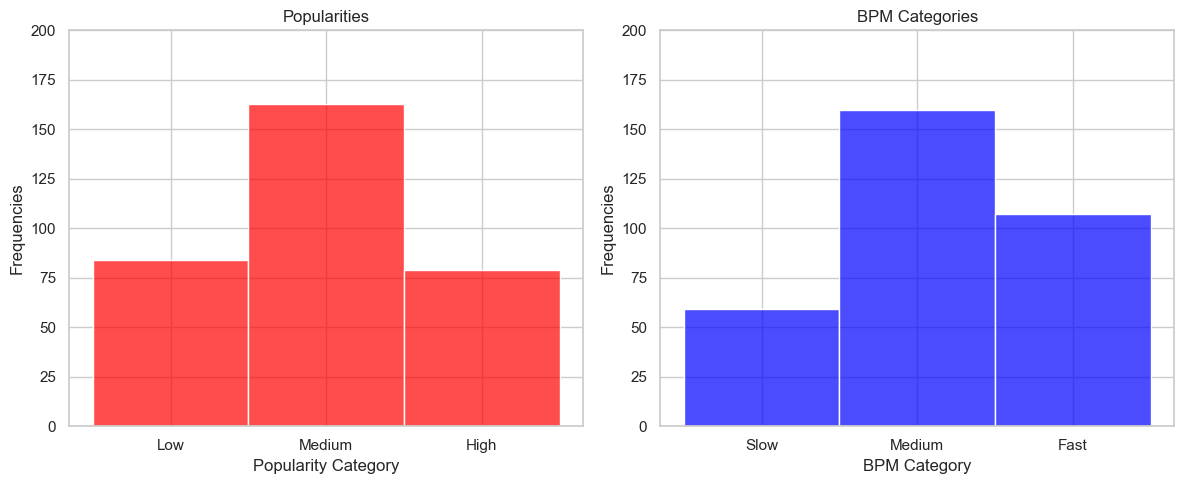

In [145]:

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a subplot matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram for 'Popularity_Category'
sns.histplot(data=df, x='Popularity_Category', bins=30, color='red', alpha=0.7, ax=axes[0])
axes[0].set_title('Popularities')
axes[0].set_ylabel('Frequencies')
axes[0].set_xlabel('Popularity Category')
axes[0].set_ylim(0, 200)

# Histogram for 'BPM_Category'
sns.histplot(data=df, x='BPM_Category', bins=30, color='blue', alpha=0.7, ax=axes[1])
axes[1].set_title('BPM Categories')
axes[1].set_ylabel('Frequencies')
axes[1].set_xlabel('BPM Category')
axes[1].set_ylim(0, 200)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

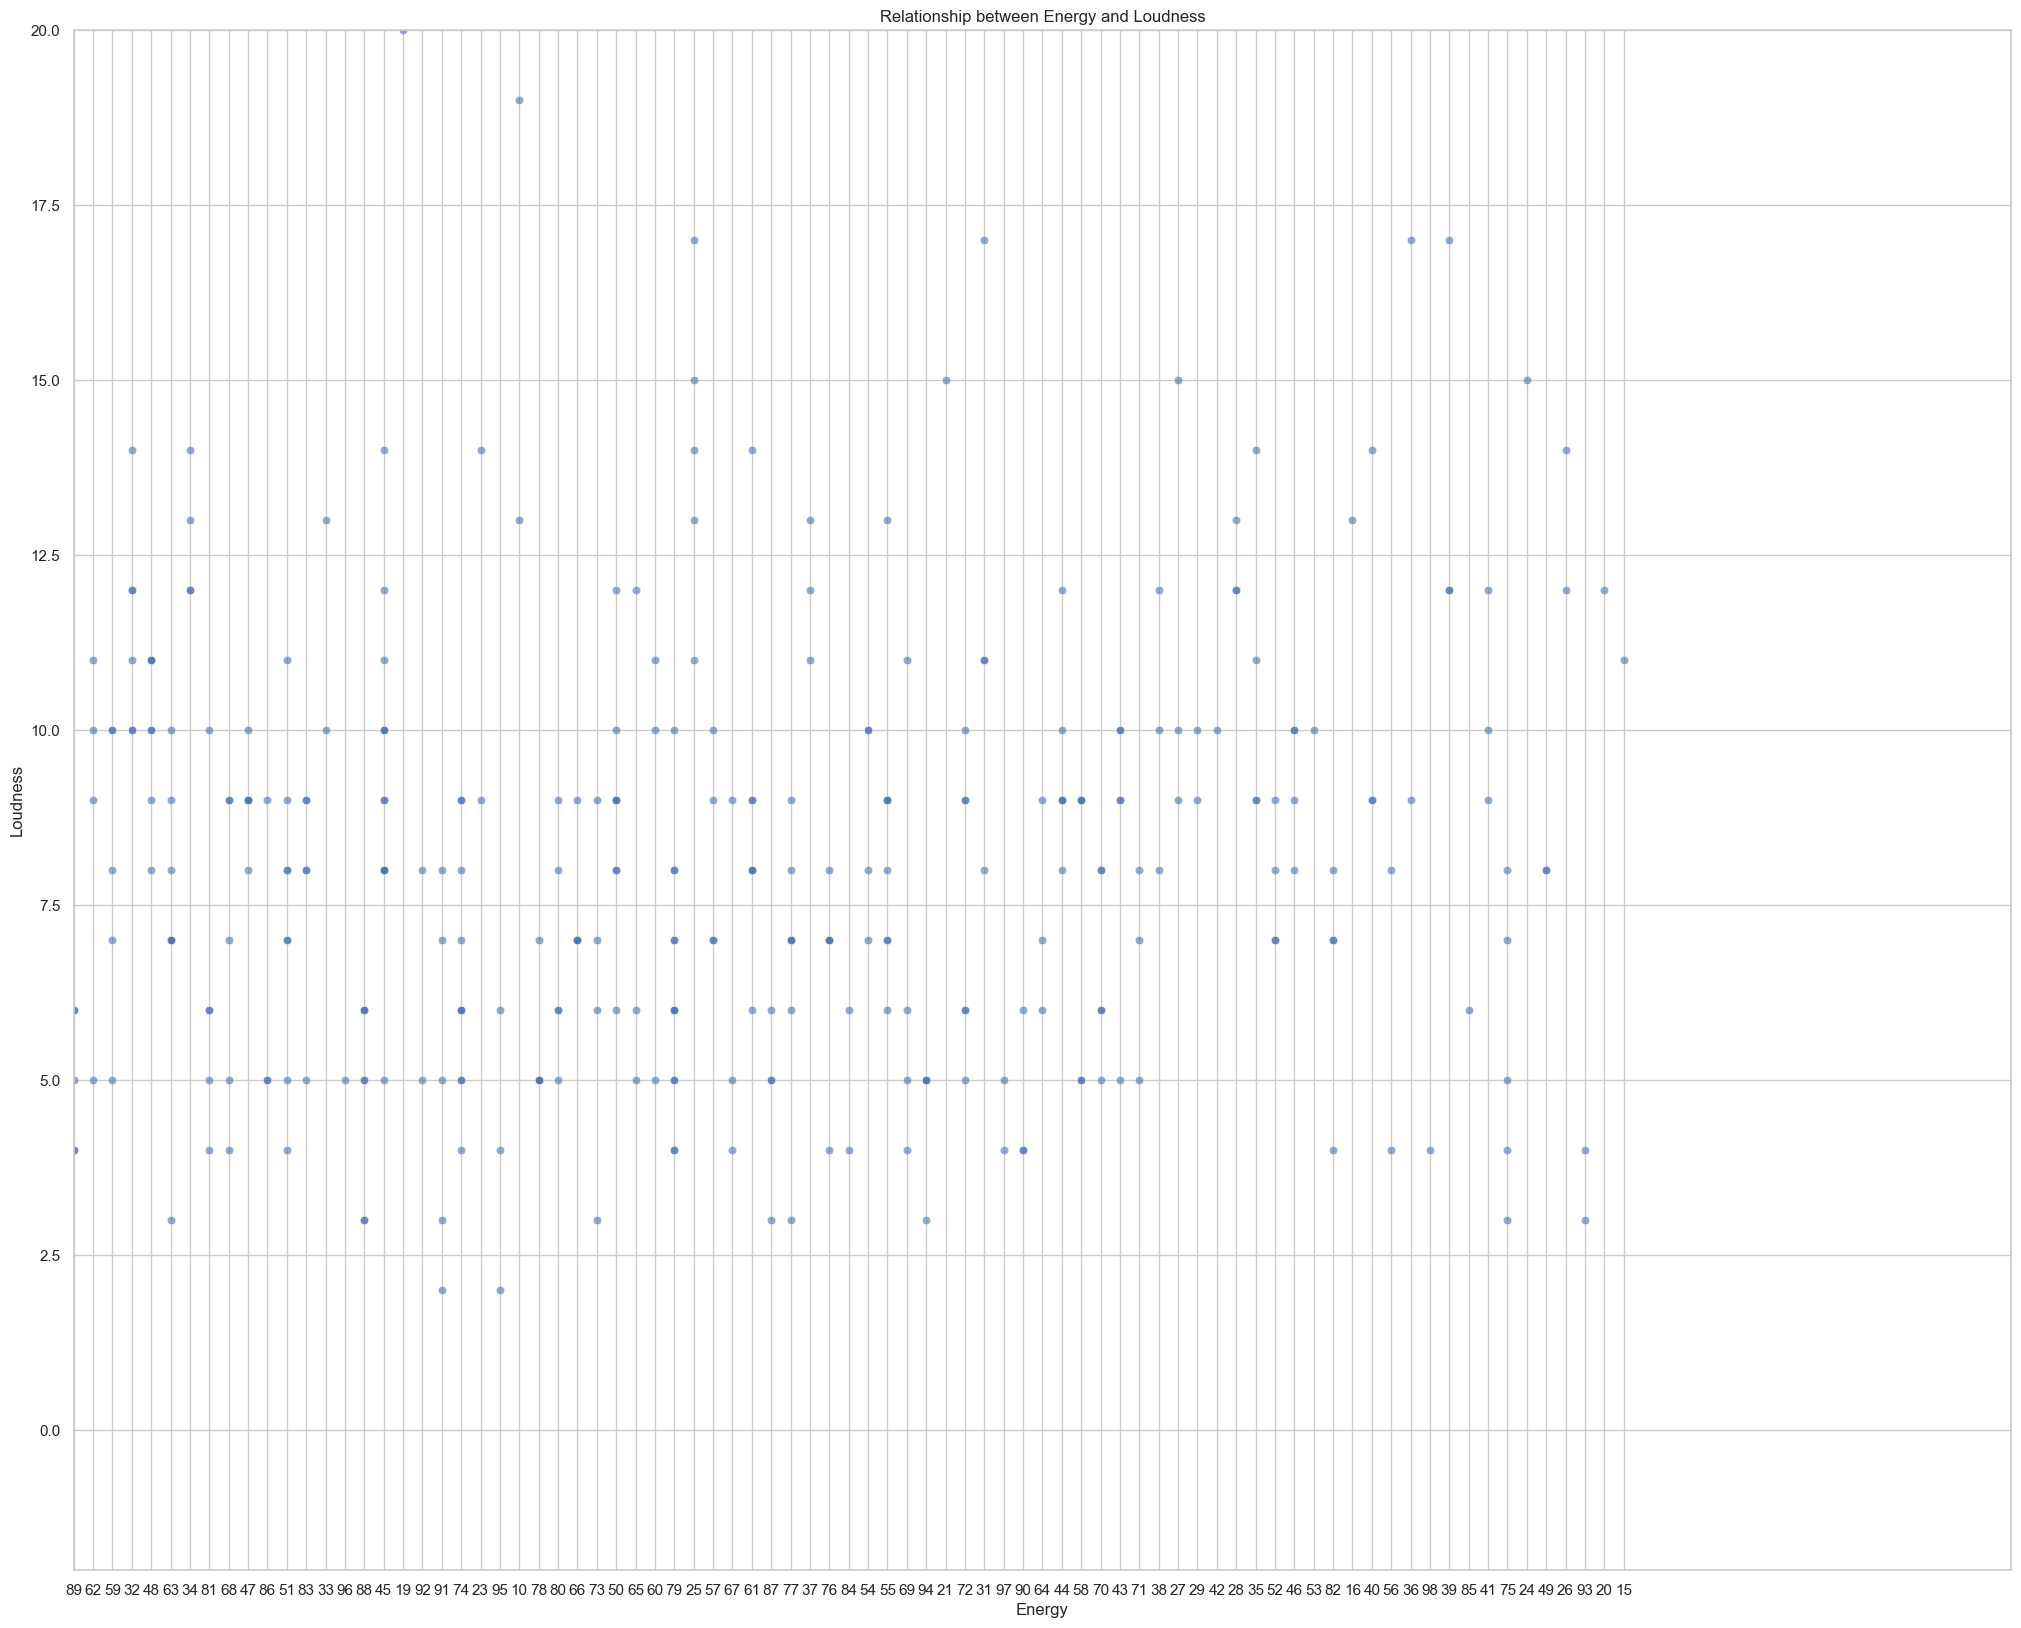

In [117]:
# Set the style
sns.set(style="whitegrid")
aa=25
bb=20

# Create a scatter plot with transparency and smaller markers
plt.figure(figsize=(aa, bb))
sns.scatterplot(x='Energy', y='Loud', data=df, alpha=0.6)

# Set plot title and axis labels
plt.title('Relationship between Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')

# Set axis limits
plt.xlim(0, 100)
plt.ylim(-2, 20)

# Show the plot
plt.show()


Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


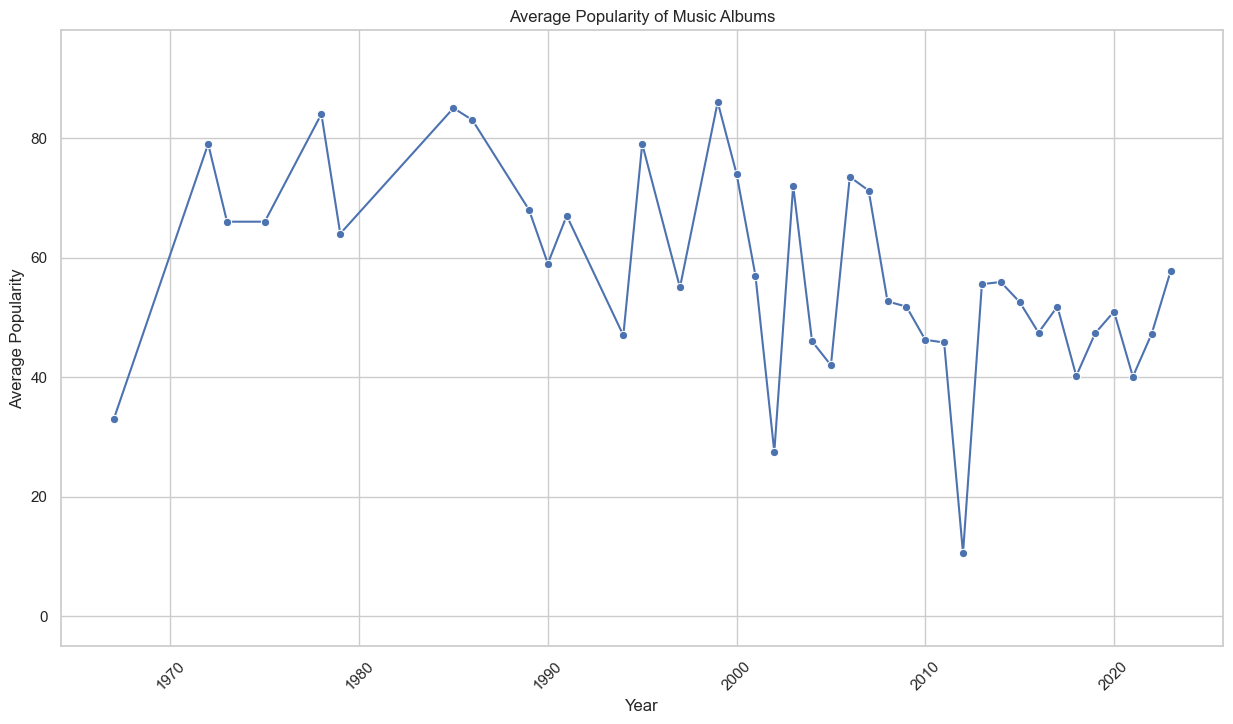

In [143]:
# Ensure 'Album Date' is in datetime format
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Extract the year from 'Album Date'
df['Year'] = df['Album Date'].dt.year

# Calculate the average popularity for each year
average_popularity_by_year = df.groupby('Year')['Popularity'].mean()

# Set up the plot
plt.figure(figsize=(15, 8))
sns.lineplot(x=average_popularity_by_year.index, y=average_popularity_by_year.values, marker='o')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums')

# Rotate x-axis tick values by 45 degrees for better readability
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(df['Popularity'].min() - 5, df['Popularity'].max() + 5)

# Display the plot
plt.show()


Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

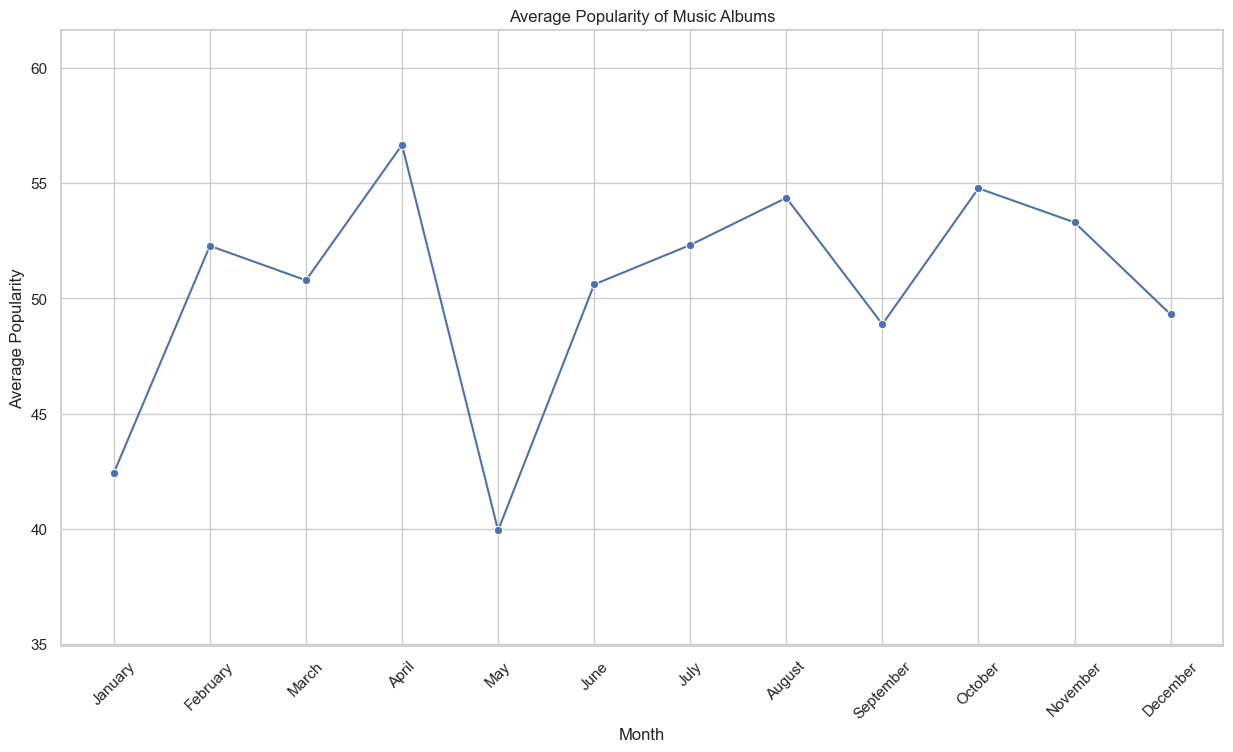

In [142]:
# Ensure 'Album Date' is in datetime format
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Extract the month from 'Album Date'
df['Month'] = df['Album Date'].dt.month

# Calculate the average popularity for each month
average_popularity_by_month = df.groupby('Month')['Popularity'].mean()

# Set up the plot
plt.figure(figsize=(15, 8))
sns.lineplot(x=average_popularity_by_month.index, y=average_popularity_by_month.values, marker='o')

# Set custom order and labels for months
custom_month_order = range(1, 13)
custom_month_labels = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
plt.xticks(custom_month_order, custom_month_labels, rotation=45)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums')

# Set y-axis limits
plt.ylim(average_popularity_by_month.min() - 5, average_popularity_by_month.max() + 5)

# Display the plot
plt.show()


Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


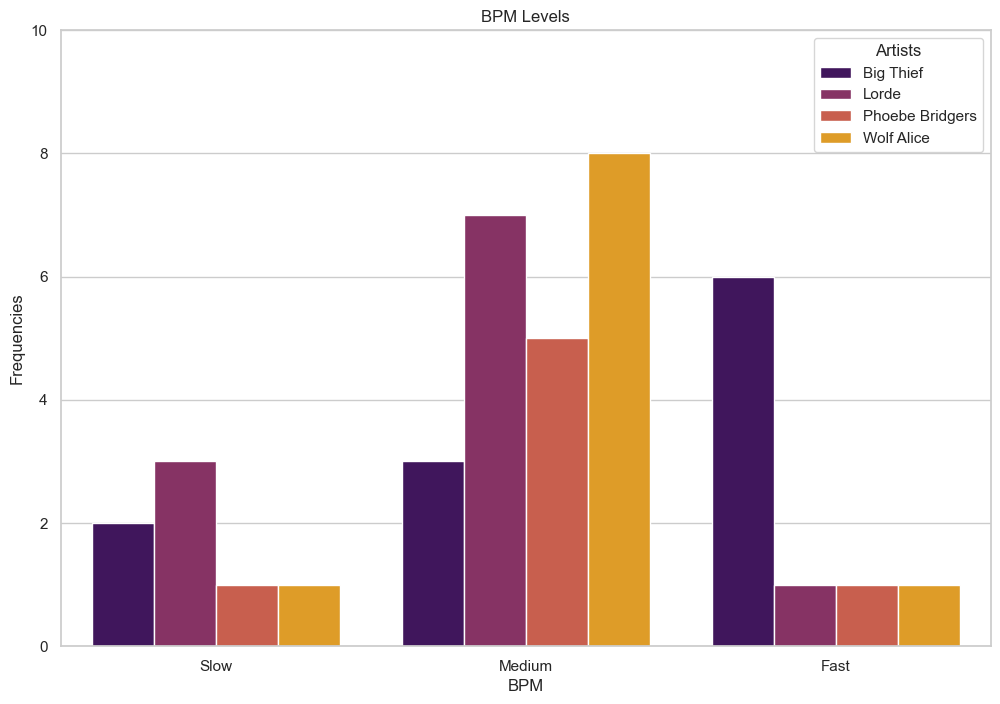

In [141]:
# Define the correct order of artists
artist_order = ['Big Thief', 'Lorde', 'Phoebe Bridgers', 'Wolf Alice']

# Filter the dataset for the specified artists
selected_artists = ['Lorde', 'Big Thief', 'Wolf Alice', 'Phoebe Bridgers']
filtered_df = df[df['Artist'].isin(selected_artists)]

# Set up the countplot with the specified order
plt.figure(figsize=(12, 8))
sns.countplot(x='BPM_Category', hue='Artist', data=filtered_df, palette='inferno', order=['Slow', 'Medium', 'Fast'], hue_order=artist_order)

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Set plot labels and title
plt.xlabel('BPM')
plt.ylabel('Frequencies')
plt.title('BPM Levels')

# Show the legend
plt.legend(title='Artists')

# Show the plot
plt.show()


We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


<Figure size 1500x800 with 0 Axes>

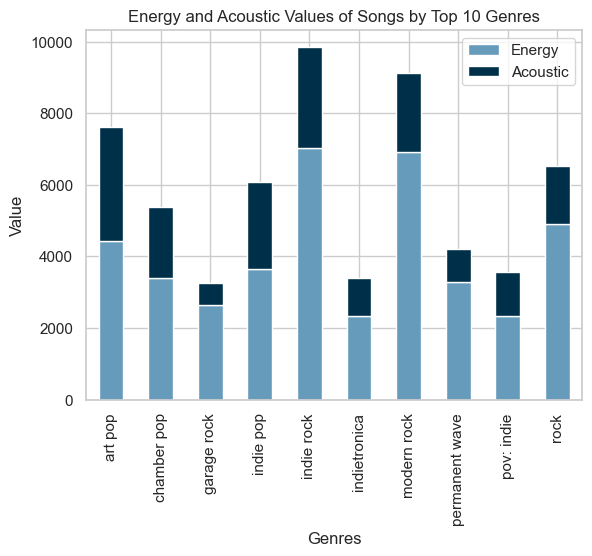

In [121]:
# Ensure 'Genres' is a string
df['Genres'] = df['Genres'].astype(str)

# Split and explode the 'Genres' column
expanded_genres = df.assign(Genres=df['Genres'].str.split(', ')).explode('Genres')

# Ensure 'Energy' and 'Acoustic' are numeric
expanded_genres['Energy'] = pd.to_numeric(expanded_genres['Energy'], errors='coerce')
expanded_genres['Acoustic'] = pd.to_numeric(expanded_genres['Acoustic'], errors='coerce')

# Find the top 10 most common genres
top_10_genres = expanded_genres['Genres'].value_counts().nlargest(10).index

# Filter the DataFrame to only include the top 10 genres
filtered_df = expanded_genres[expanded_genres['Genres'].isin(top_10_genres)]

# Calculate the sum of 'Energy' and 'Acoustic' values for each genre
aggregated_values = filtered_df.groupby('Genres')[['Energy', 'Acoustic']].sum()

# Create the stacked bar chart
plt.figure(figsize=(15, 8))
aggregated_values.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'])

# Set the labels and title
plt.xlabel('Genres')
plt.ylabel('Value')
plt.title('Energy and Acoustic Values of Songs by Top 10 Genres')


# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

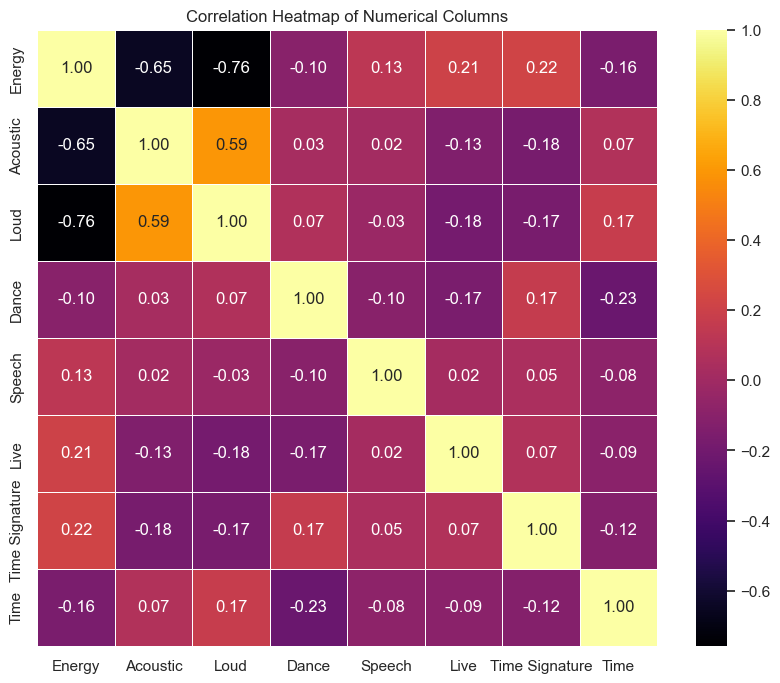

In [135]:


# Ensure 'Time' is in datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%M:%S', errors='coerce')

# Select the relevant numerical columns
numerical_columns = ['Energy', 'Acoustic', 'Loud', 'Dance', 'Speech', 'Live', 'Time Signature', 'Time']

# Create a subset of the DataFrame with only numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Columns')

# Display the plot
plt.show()


And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [140]:
import requests
from bs4 import BeautifulSoup

# Replace 'QQQQ' with the actual link to your chat history

# Send a GET request to the URL
response = requests.get('https://chat.openai.com/share/b11a587f-e0ba-45e7-812f-2f0c465745e8')

#Honestly, I could not understand the output of this cell very well.
#However if you do not understan it either, you can copy the link above, and can look at by pasting it to google.

response.status_code
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Print the HTML content
print(soup.prettify())
#else:
    #print(f"Failed to retrieve the HTML content. Status code: {response.status_code}")


<html>
 <head>
  <style global="">
   body{font-family:Arial,Helvetica,sans-serif}.container{align-items:center;display:flex;flex-direction:column;gap:2rem;height:100%;justify-content:center;width:100%}@keyframes enlarge-appear{0%{opacity:0;transform:scale(75%) rotate(-90deg)}to{opacity:1;transform:scale(100%) rotate(0deg)}}.logo{color:#8e8ea0}.scale-appear{animation:enlarge-appear .4s ease-out}@media (min-width:768px){.scale-appear{height:48px;width:48px}}.data:empty{display:none}.data{border-radius:5px;color:#8e8ea0;text-align:center}@media (prefers-color-scheme:dark){body{background-color:#343541}.logo{color:#acacbe}}
  </style>
  <meta content="375" http-equiv="refresh"/>
 </head>
 <body>
  <div class="container">
   <div class="logo">
    <svg class="scale-appear" fill="none" height="41" strokewidth="2" viewbox="0 0 41 41" width="41" xmlns="http://www.w3.org/2000/svg">
     <path d="M37.5324 16.8707C37.9808 15.5241 38.1363 14.0974 37.9886 12.6859C37.8409 11.2744 37.3934 9.91076 36

Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

